In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Iterate through the uploaded files and load them into pandas
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

    # Load the uploaded CSV file into a pandas DataFrame
    data = pd.read_csv(filename)

    # Display the first few rows of the data
    print(data.head())

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset.csv
Uploaded file: diabetes_prediction_dataset.csv
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['smoking_history'] = le.fit_transform(data['smoking_history'])


In [ ]:
# Split data into features and target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train models and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
print(results)


{'Random Forest': 0.9705, 'KNN': 0.96135, 'AdaBoost': 0.9721, 'Decision Tree': 0.95215, 'Logistic Regression': 0.9587}


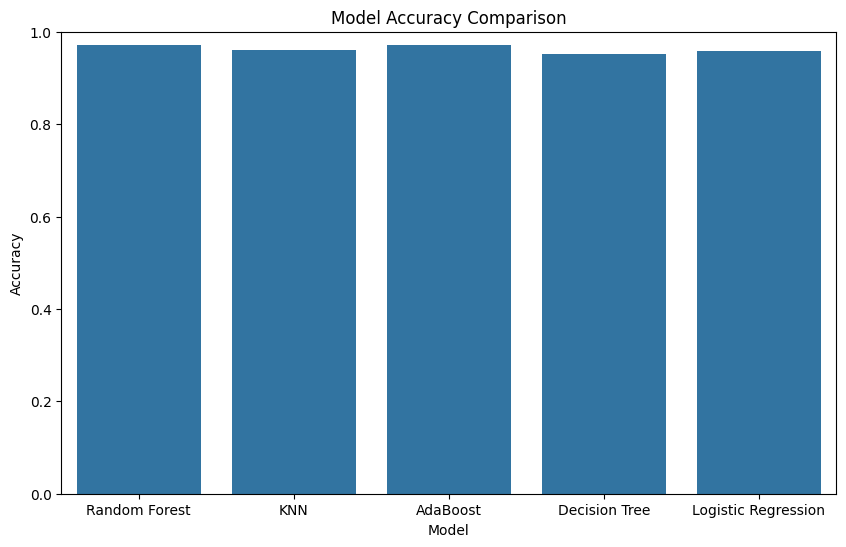

In [ ]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()


In [ ]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing 

In [ ]:
import gradio as gr


In [ ]:
import gradio as gr
import pandas as pd

# Assuming 'le' is the LabelEncoder used earlier for training
# Map categorical values manually
gender_map = {'Male': 1, 'Female': 0}
smoking_history_map = {'never': 0, 'current': 1, 'former': 2, 'No Info': 3}

# Define the prediction function
def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    try:
        # Map the categorical inputs
        gender = gender_map[gender]
        smoking_history = smoking_history_map[smoking_history]

        # Create a data frame with input values
        input_data = pd.DataFrame([[gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level]],
                                  columns=X.columns)

        # Standardize the input data
        input_data_scaled = scaler.transform(input_data)

        # Predict diabetes
        prediction = model.predict(input_data_scaled)[0]

        return "Diabetic" if prediction == 1 else "Not Diabetic"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Create Gradio Interface using the updated API
iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Radio(['Male', 'Female'], label='Gender'),
        gr.Slider(0, 100, label='Age'),
        gr.Radio([0, 1], label='Hypertension'),
        gr.Radio([0, 1], label='Heart Disease'),
        gr.Dropdown(['never', 'current', 'former', 'No Info'], label='Smoking History'),
        gr.Slider(10, 50, label='BMI'),
        gr.Slider(3.0, 10.0, label='HbA1c Level'),
        gr.Slider(70, 200, label='Blood Glucose Level')
    ],
    outputs=gr.Textbox(label='Diabetes Prediction')
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1ab9e79d6358b07996.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
